In [1]:
import warnings
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import control.matlab as ml
from math import pi
from scipy import signal
warnings.filterwarnings('ignore')

## Transferencia:


$$ H(s) = \dfrac{1, 356.10^7 . s^2}{s^4 + s^3 . 5207 + s^2 . 1,389 . 10^8 + s . 3,264 . 10^{11} + 3,928 . 10^{15}} $$

## Ejercicio 1 

#### Definir el tipo de filtro, calcular los polos y los ceros de la H(s), ωo y Q si corresponde

Para hallar el tipo de filtro veo los valores de H en o y en el infinito

$$ H(0) = 0 $$ 
$$ H(\infty) = 0 $$

Por lo que el filtro es uno de tipo **pasabanda**

In [2]:
num = [1.356 * 10**7, 0, 0]
den = [1, 5207, 1.389 * 10**8, 3.264 *10**11, 3.928*10**15]

H = ml.tf(num, den)
H

TransferFunction(array([13560000.,        0.,        0.]), array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]))

## Ceros y polos

In [3]:
print("Ceros:")
zeros = ml.zero(H)
for i,z in enumerate(zeros):
    print("z{}: {}".format(i + 1, z))

print("\nPolos:")
poles = ml.pole(H)
for i,p in enumerate(poles):
    print("p{}: {}".format(i + 1, p))

Ceros:
z1: 0.0
z2: 0.0

Polos:
p1: (-1514.9600990571644+9220.855933354847j)
p2: (-1514.9600990571644-9220.855933354847j)
p3: (-1088.5399009428356+6618.1126141820005j)
p4: (-1088.5399009428356-6618.1126141820005j)


## $\omega_0$ y $Q$

Para hallar $\omega_0$ y $Q$, factorizo el denominador de tal forma que me quede algo del siguiente estilo:

$$s^2 + \dfrac{\omega_0}{Q} + \omega_{0}^2$$

Al tener dos pares de raíces complejas conjugadas obtendré dos polinomios y asi obtendre los dos valores de Q y de $\omega_0$

In [4]:
p2 = np.poly1d([poles[0], poles[1]], r = True, variable = "s")
p1 = np.poly1d([poles[2], poles[3]], r = True, variable = "s")

print("Polinomio 1: \n", p1)
print("\nPolinomio 2: \n", p2)

Polinomio 1: 
    2
1 s + 2177 s + 4.498e+07

Polinomio 2: 
    2
1 s + 3030 s + 8.732e+07


In [5]:
w01 = round(np.sqrt(p1[0]), 4)
w02 = round(np.sqrt(p2[0]), 4)
Q1 = round(w01 / p1[1], 4)
Q2 = round(w02 / p2[1], 4)

## Parametros

In [6]:
sigma1 = round(poles[0].real,4)
sigma2 = round(poles[2].real, 4)

tau1 = round(1 / abs(sigma1), 4)
tau2 = round(1 / abs(sigma2), 4)

tau = tau1 if tau1 > tau2 else tau2
f01 = round(w01 / (2 * np.pi), 4)
f02 = round(w02 / (2 * np.pi), 4)

print("w01 = ", w01)
print("w02 = ", w02)
print("f01 = ", f01)
print("f02 = ", f02)
print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("sigma1 = ", sigma1)
print("tau1 = ", tau1)
print("sigma2 = ", sigma2)
print("tau2 = ", tau2)

w01 =  6707.0361
w02 =  9344.479
f01 =  1067.4579
f02 =  1487.22
Q1 =  3.0807
Q2 =  3.0841
sigma1 =  -1514.9601
tau1 =  0.0007
sigma2 =  -1088.5399
tau2 =  0.0009


## Ejercicio 2 

#### Realizar las siguientes simulaciones:
    a. Diagramas de Bode de modulo y fase.
    b. Respuesta al escalon.
    c. Respuesta al impulso.
    d. Respuesta a señal senoidal. Elegir 3 frecuencias que sean acordes a la caracteristica del filtro.
    e. Respuesta a señal cuadrada de estas frecuencias: fo/10, fo y 10 · fo .

## Diagramas de Bode

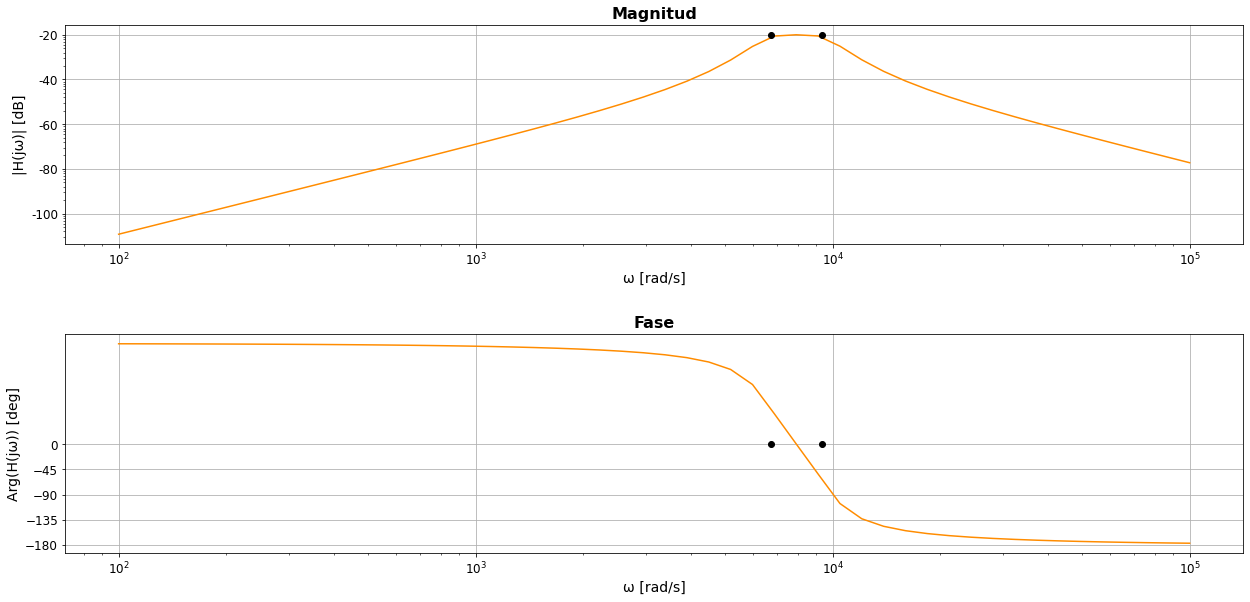

In [7]:
def bodePlots(H, w01 = None, w02 = None,lineColor = "darkorange"):
    mag, phase, omega = ml.bode(H, dB = True, deg = True, color = "darkorange", plot = False)
    phase = [ph * 180 / np.pi for ph in phase]  #Siempre te devuelve en radianes la funcion
    yTicksBodeMg = [str(i) for i in range(-140, 20, 20)]
    yTicksBodePh = [i for i in range(-360, 45, 45)]
    
    fig, axs = plt.subplots(2)
    #Bode Magnitude Plot
    axs[0].plot(omega, mag, color = lineColor)
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[0].set_yticklabels(yTicksBodeMg)
    axs[0].set_xlabel('ω [rad/s]', fontsize = 14)
    axs[0].set_ylabel('|H(jω)| [dB]', fontsize = 14)
    axs[0].set_title('Magnitud', fontsize = 16, fontweight = 'bold')
    if (w01 != None):
        axs[0].plot(w01, 1, marker = 'o',c = 'black')
    if (w02 != None):
        axs[0].plot(w02, 1, marker = 'o',c = 'black')
    
    axs[0].tick_params(axis='both', labelsize=12)
    axs[0].grid()
    
    #Bode Phase Plot
    axs[1].plot(omega, phase, color = lineColor)
    axs[1].set_xscale("log")
    axs[1].set_yticks(yTicksBodePh)
    axs[1].set_xlabel('ω [rad/s]', fontsize = 14)
    axs[1].set_ylabel('Arg(H(jω)) [deg]', fontsize = 14)
    axs[1].set_title('Fase', fontsize = 16, fontweight = 'bold')
    if (w01 != None):
        axs[1].plot(w01, 1, marker = 'o',c = 'black')
    if (w02 != None):
        axs[1].plot(w02, 1, marker = 'o',c = 'black')
        
    axs[1].tick_params(axis='both', labelsize=12)
    axs[1].grid()
    
    fig.set_size_inches(18, 9)
    fig.tight_layout(pad=3.0)
    plt.show();
    
bodePlots(H, w01, w02)

## Respuesta al escalón

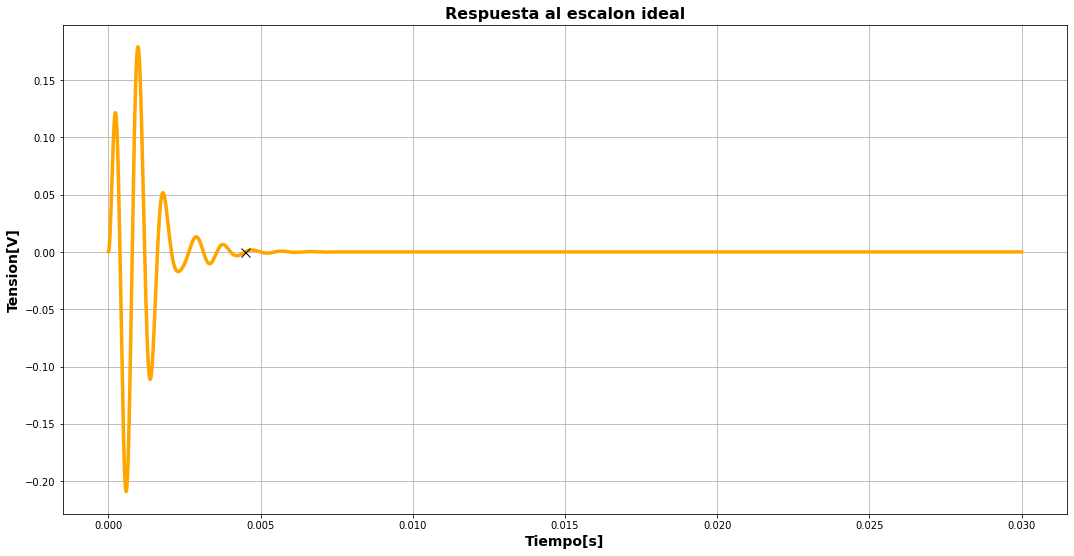

In [8]:
plt.figure(figsize=(18,9))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.step(H, T=t)
plt.plot(T, yout, color = "orange", linewidth = 3.5)
plt.title("Respuesta al escalon ideal", fontsize = 16, fontweight = "bold")
plt.xlabel("Tiempo[s]", fontsize = 14, fontweight = "bold")
plt.ylabel("Tension[V]", fontsize = 14, fontweight = "bold")
plt.plot(5 * tau, 0, color = 'black', marker = 'x', markersize = '9')
plt.grid()
plt.show();

## Respuesta al impulso

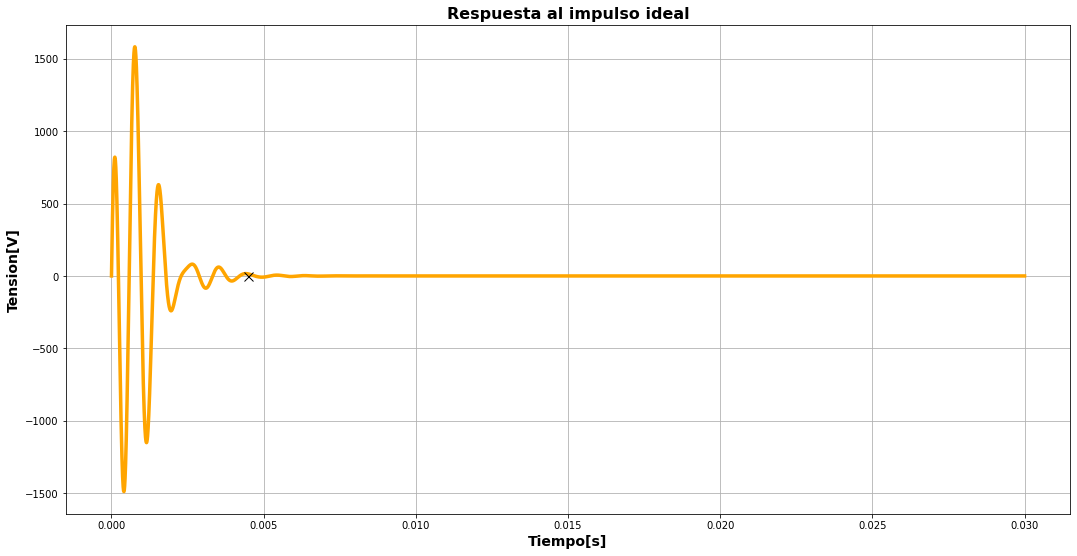

In [9]:
plt.figure(figsize=(18,9))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.impulse(H, T=t)
plt.plot(T, yout, color = "orange", linewidth = 3.5)
plt.title("Respuesta al impulso ideal", fontsize = 16, fontweight = "bold")
plt.xlabel("Tiempo[s]", fontsize = 14, fontweight = "bold")
plt.ylabel("Tension[V]", fontsize = 14, fontweight = "bold")
plt.plot(5 * tau, 0, color = 'black', marker = 'x', markersize = '9')
plt.grid()
plt.show();

## Respuesta a la señal senoidal ideal

In [10]:
def plotSignalResponse(freqs, Hs, data = None, sigSquare = True, freqsText = ["f0 / 10", "f0", "10 * f0"]):
    #Hs = [H, Hcalc]
    legends = ["Ideal", "Normalizada", "Simulada"]
    colors = ["darkorange", "blue", "lightgreen"]
    title = "Respuesta a la " + ("cuadrada " if sigSquare else "senoidal ")
    
    fig, axs = plt.subplots(3)
    for i,f in enumerate(freqs):
        axs[i].set_title(title + freqsText[i], fontsize = 16, fontweight = 'bold')
        t = np.linspace(0, 10 / f, 1000000, endpoint=False) if sigSquare else np.linspace(0, 0.03, 1000000, endpoint=False)
        sig = signal.square(2 * np.pi * f * t) if sigSquare else np.sin(2 * np.pi * f * t)
        axs[i].plot(t, sig, color='black', label = 'Entrada', linestyle='--')
        axs[i].set_ylabel('Tension [V]', fontsize = 14)
        axs[i].set_xlabel('Tiempo [s]', fontsize = 14) 
        axs[i].tick_params(axis='both', labelsize=12)
        axs[i].grid()
        for j,H in enumerate(Hs):
            yout, T, xout = ml.lsim(H, sig, t)
            axs[i].plot(T, yout, color=colors[j], label=legends[j])
        
        if (data):
            #que sea una lista de listas o no se que da spice, por ahora no hago nada
            print("Sarasa")
        
        axs[i].legend(loc='upper right', fontsize = 'x-large')
        
              
    fig.set_size_inches(18, 19)
    fig.tight_layout(pad=3.0)
    plt.show();

In [11]:
f0 = (w01 + w02)/(4*pi)
dec = 10
freqs = [f0 / dec, f0, f0 * dec]

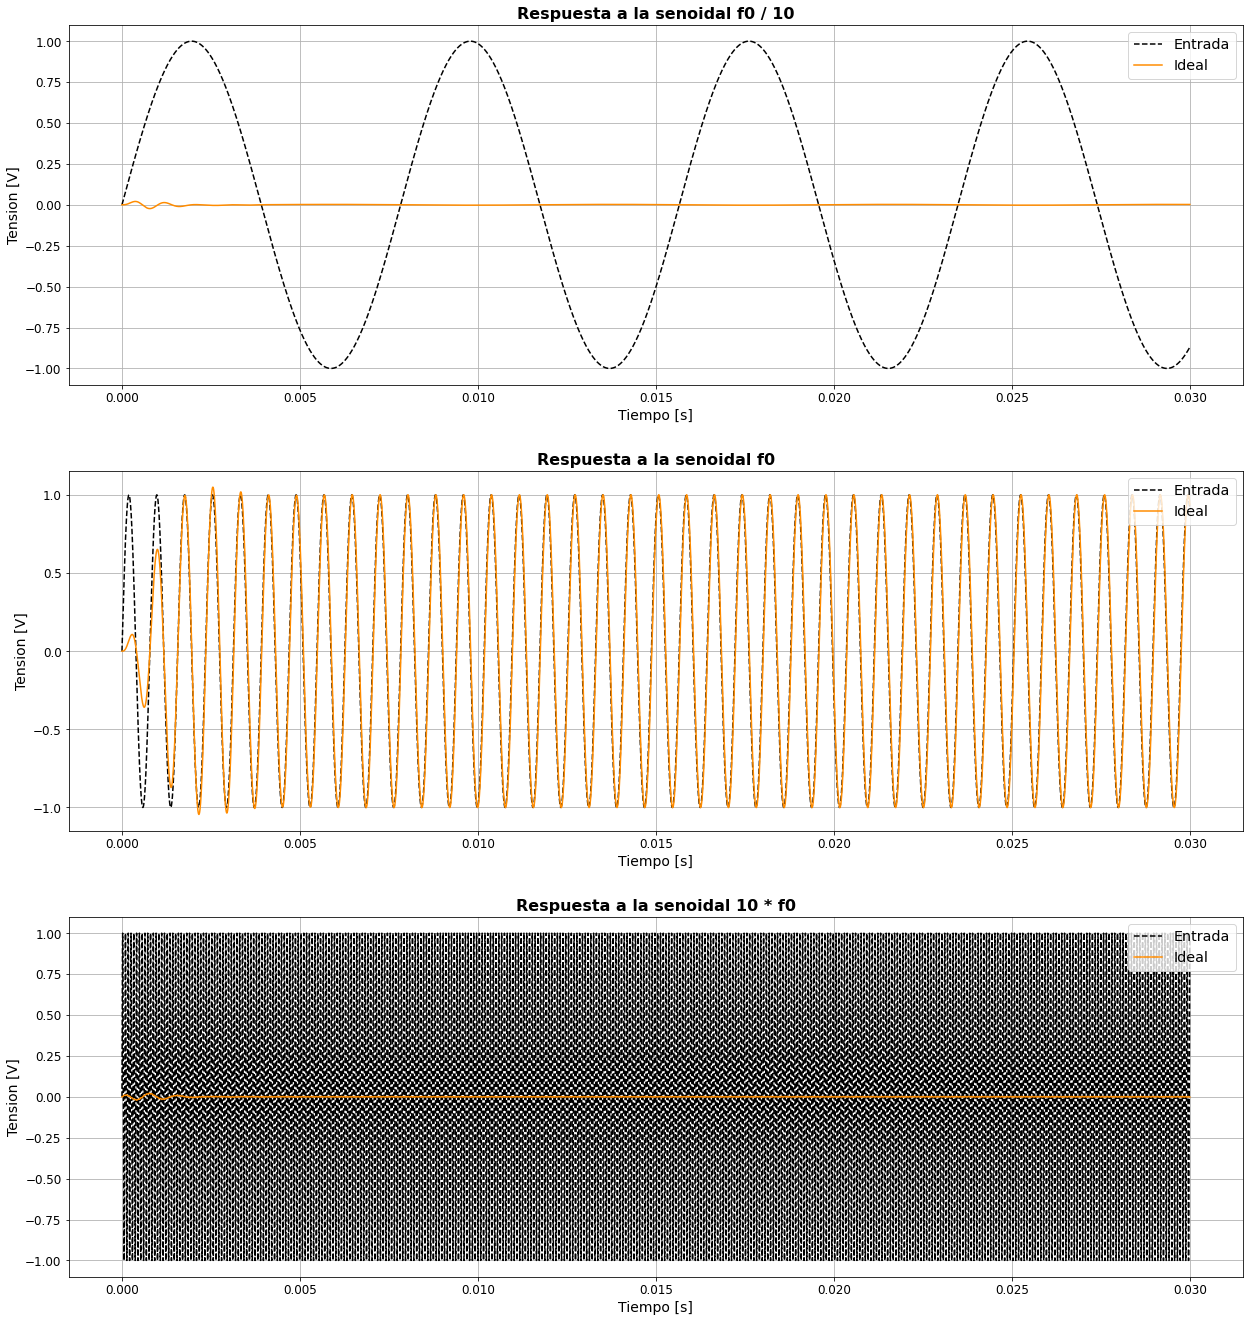

In [12]:
plotSignalResponse(freqs, [H], sigSquare=False)

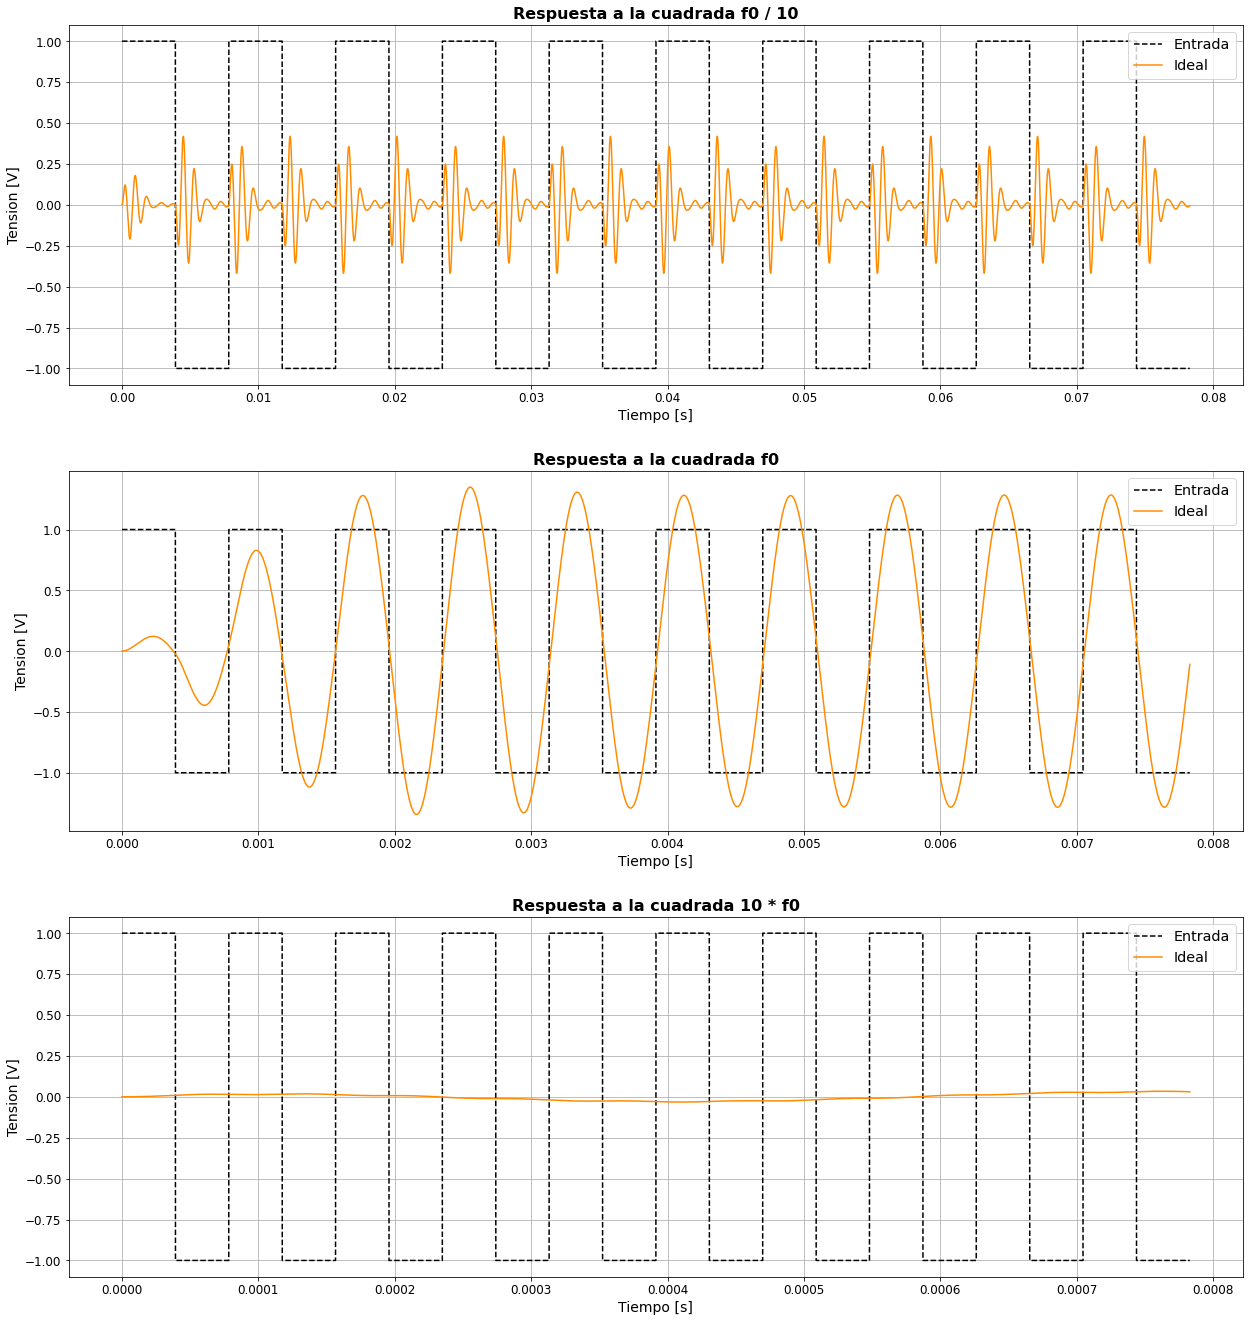

In [13]:
plotSignalResponse(freqs, [H])

## Ejercicio 3

Elegir un circuito con amplificadores operacionales que cumpla con la transferencia propuesta.  
Justificar la eleccion del mismo

## Ejercicio 4

Definir los valores de los componentes y recalcular la transferencia con los
valores normalizados de los componentes elegidos.

In [14]:
#Primer circuito
b0_c1 = np.sqrt(num[0])
a2_c1 = 1
a1_c1 = p1[1]
a0_c1 = p1[0]

w0_c1 = np.sqrt(a0_c1)
alpha_c1 = a1_c1/w0_c1
Q_c1 = 1/alpha_c1
H_c1 = b0_c1/w0_c1

print(f'''
    w0: {w0_c1:.2f}
    alpha: {alpha_c1:.2f}
    Q: {Q_c1:.2f}
    H: {H_c1:.2f}
''')


    w0: 6707.04
    alpha: 0.32
    Q: 3.08
    H: 0.55



In [15]:
#CON C DE 100 nano
C1 = 100e-9
k_c1 = w0_c1*C1
C2 = C1
R1 = 1/(H_c1*k_c1)
R2 = 1/((2*Q_c1-H_c1)*k_c1)
R5 = 2*Q_c1/k_c1

print(f'''
    C1: {C1}
    k: {k_c1}
    C2: {C2}
    R1: {R1}
    R2: {R2}
    R5: {R5}
''')


    C1: 1e-07
    k: 0.0006707036133042639
    C2: 1e-07
    R1: 2715.6272329678422
    R2: 265.653659076891
    R5: 9186.617772429407



In [16]:
num_1 = [1/(R1*C1), 0]
den_1 = [1, (C1+C2)/(C1*C2*R5), (1/R1+1/R2)/(R5*C1*C2)]

H1 = ml.tf(num_1, den_1)
H1

TransferFunction(array([3682.3905279,    0.       ]), array([1.00000000e+00, 2.17707980e+03, 4.49843337e+07]))

In [17]:
h1 = signal.TransferFunction(num_1, den_1)
h1

TransferFunctionContinuous(
array([3682.3905279,    0.       ]),
array([1.00000000e+00, 2.17707980e+03, 4.49843337e+07]),
dt: None
)

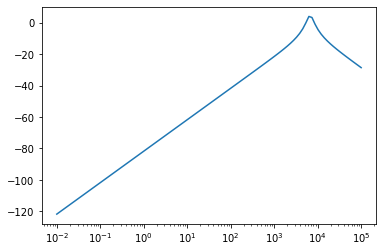

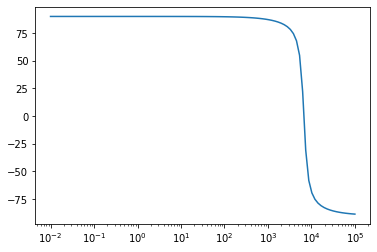

In [18]:
w, mag, phase = signal.bode(h1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [19]:
#Segundo circuito
b0_c2 = np.sqrt(num[0])
a2_c2 = 1
a1_c2 = p2[1]
a0_c2 = p2[0]

w0_c2 = np.sqrt(a0_c2)
alpha_c2 = a1_c2/w0_c2
Q_c2 = 1/alpha_c2
H_c2 = b0_c2/w0_c2

print(f'''
    w0: {w0_c2:.2f}
    alpha: {alpha_c2:.2f}
    Q: {Q_c2:.2f}
    H: {H_c2:.2f}
''')


    w0: 9344.48
    alpha: 0.32
    Q: 3.08
    H: 0.39



In [20]:
#CON C DE 100 nano
C3 = 100e-9
k_c2 = w0_c2*C3
C4 = C3
R3 = 1/(H_c2*k_c2)
R4 = 1/((2*Q_c2-H_c2)*k_c2)
R6 = 2*Q_c2/k_c2

print(f'''
    C3: {C3}
    k: {k_c2}
    C4: {C4}
    R3: {R3}
    R4: {R4}
    R6: {R6}
''')


    C3: 1e-07
    k: 0.0009344479024826401
    C4: 1e-07
    R3: 2715.6272329678422
    R4: 185.3375003805216
    R6: 6600.833913859185



In [21]:
num_2 = [1/(R3*C4), 0]
den_2 = [1, (C3+C4)/(C3*C4*R6), (1/R3+1/R4)/(R6*C3*C4)]

H2 = ml.tf(num_2, den_2)
H2

TransferFunction(array([3682.3905279,    0.       ]), array([1.00000000e+00, 3.02992020e+03, 8.73192882e+07]))

In [22]:
h2 = signal.TransferFunction(num_2, den_2)
h2

TransferFunctionContinuous(
array([3682.3905279,    0.       ]),
array([1.00000000e+00, 3.02992020e+03, 8.73192882e+07]),
dt: None
)

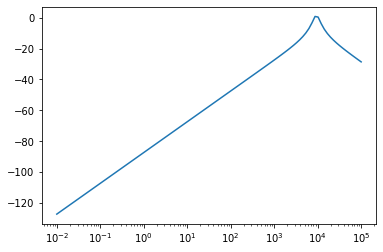

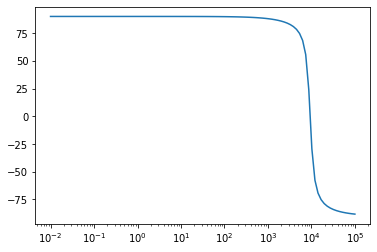

In [23]:
w, mag, phase = signal.bode(h2)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [24]:
#Poniendo los dos circuitos en cascada
poles = np.concatenate((h1.to_zpk().poles, h2.to_zpk().poles))
zeros = np.concatenate((h1.to_zpk().zeros, h2.to_zpk().zeros))
gain = h1.to_zpk().gain*h2.to_zpk().gain

htot = signal.ZerosPolesGain(zeros, poles, gain)
htot.to_tf()

TransferFunctionContinuous(
array([13560000.,        0.,        0.]),
array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]),
dt: None
)

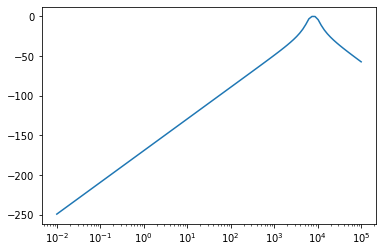

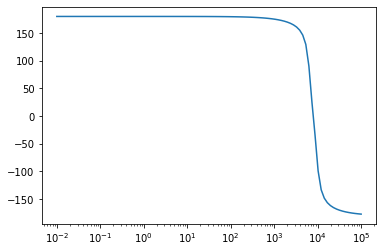

In [25]:
w, mag, phase = signal.bode(htot)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [26]:
#Calculo el error con los componentes normalizados
#Primer circuito
print(f'''
    R1: {R1}
    R2: {R2}
    R5: {R5}
''')


    R1: 2715.6272329678422
    R2: 265.653659076891
    R5: 9186.617772429407



In [27]:
R1 = 2700
R2 = 270
R5 = 9100

In [28]:
def errorPercentage(trueValue, value):
    return abs(trueValue - value) * 100 / trueValue

In [29]:
w0_c1 = np.sqrt((1/R1+1/R2)/(R5*C1*C2))
Q_c1 = w0_c1 / ((C1+C2)/(C1*C2*R5))

error_w0_1 = errorPercentage(w01, w0_c1)
error_Q_1 = errorPercentage(Q1, Q_c1)

print(f'''
    Error w0: {error_w0_1}
    Error Q: {error_Q_1 }
''')


    Error w0: 0.2384655593259354
    Error Q: 1.1775191149179172



In [30]:
#Segundo circuito
print(f'''
    R3: {R3}
    R4: {R4}
    R6: {R6}
''')


    R3: 2715.6272329678422
    R4: 185.3375003805216
    R6: 6600.833913859185



In [31]:
R3 = 2700
R4 = 180
R6 = 6800

In [32]:
w0_c2 = np.sqrt((1/R3+1/R4)/(R6*C3*C4))
Q_c2 = w0_c2 / ((C3+C4)/(C3*C4*R6))

error_w0_2 = errorPercentage(w02, w0_c2)
error_Q_2 = errorPercentage(Q2, Q_c2)

print(f'''
    Error w0: {error_w0_2}
    Error Q: {error_Q_2 }
''')


    Error w0: 0.09929328123340245
    Error Q: 2.9139194728928715



In [33]:
#Del circuito total 
num_1 = [1/(R1*C1), 0]
den_1 = [1, (C1+C2)/(C1*C2*R5), (1/R1+1/R2)/(R5*C1*C2)]

H1 = ml.tf(num_1, den_1)

num_2 = [1/(R3*C4), 0]
den_2 = [1, (C3+C4)/(C3*C4*R6), (1/R3+1/R4)/(R6*C3*C4)]

H2 = ml.tf(num_2, den_2)

Htot = H1 * H2
Htot

TransferFunction(array([13717421.12482853,        0.        ,        0.        ]), array([1.00000000e+00, 5.13897867e+03, 1.38380138e+08, 3.23206206e+11,
       3.90152896e+15]))

In [34]:
H

TransferFunction(array([13560000.,        0.,        0.]), array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]))